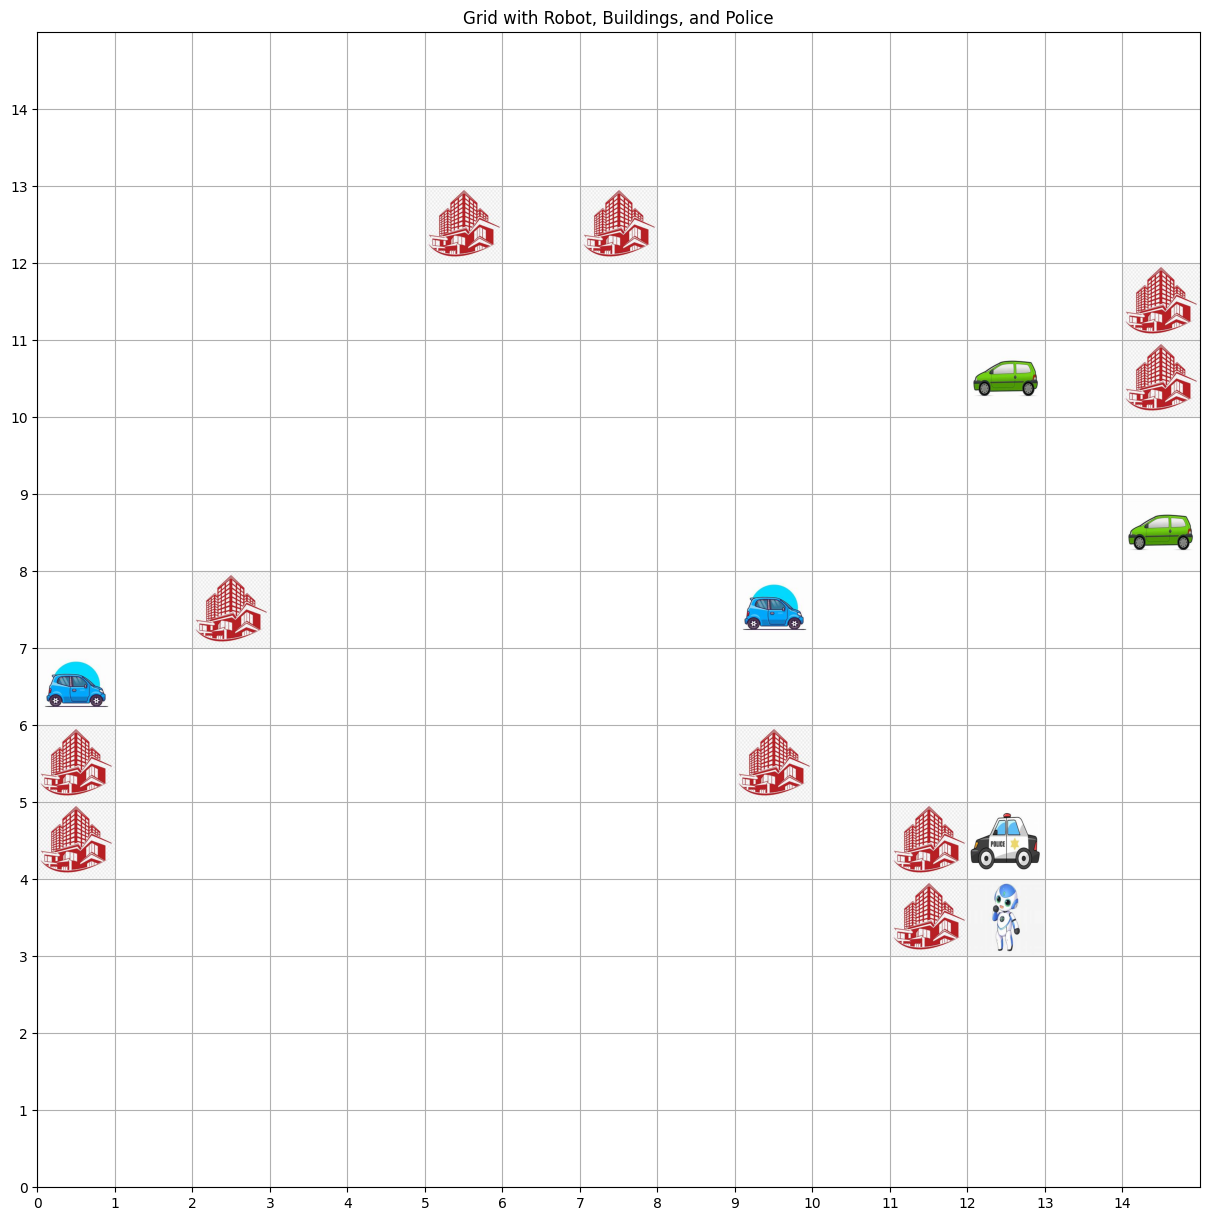

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

def plot_grid_with_robot_and_buildings(robot_image_path, building_image_path, police_image_path, car1_image_path, car2_image_path, building_locations, robot_location, police_location, car1_locations, car2_locations, grid_size=(15, 15)):
    """
    Plot a grid with buildings, a robot, police, car1, and car2.

    Parameters:
        robot_image_path (str): Path to the image file for the robot.
        building_image_path (str): Path to the image file for buildings.
        police_image_path (str): Path to the image file for police.
        car1_image_path (str): Path to the image file for car1.
        car2_image_path (str): Path to the image file for car2.
        grid_size (tuple): Size of the grid in (rows, columns).
        building_locations (list of tuples): Locations for buildings.
        robot_location (tuple): Location for the robot.
        police_location (tuple): Location for the police.
        car1_locations (list of tuples): Locations for car1.
        car2_locations (list of tuples): Locations for car2.
    """
    fig, ax = plt.subplots(figsize=(grid_size[1], grid_size[0]))  # Adjust figsize to match grid_size
    ax.set_title("Grid with Robot, Buildings, and Police")
    ax.set_xticks(np.arange(0, grid_size[1], 1))
    ax.set_yticks(np.arange(0, grid_size[0], 1))
    ax.grid(True)

    # Plot buildings, robot, police, car1, and car2
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Calculate the cell position
            cell_x = j
            cell_y = grid_size[0] - i - 1  # Invert y-axis

            if building_locations and (i, j) in building_locations:
                image = Image.open(building_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif robot_location and (i, j) == robot_location:
                image = Image.open(robot_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif police_location and (i, j) == police_location:
                image = Image.open(police_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif car1_locations and (i, j) in car1_locations:
                image = Image.open(car1_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            elif car2_locations and (i, j) in car2_locations:
                image = Image.open(car2_image_path)
                ax.imshow(image, extent=[j, j + 1, i, i + 1], aspect='auto', zorder=1)
            else:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white', zorder=0))

    plt.gca().invert_yaxis()  # Invert y-axis to match grid orientation
    plt.xlim(0, grid_size[1])  # Set x-axis limit
    plt.ylim(0, grid_size[0])  # Set y-axis limit
    plt.show()
    plt.close()


def generate_random_locations(grid_size=(15, 15), num_buildings=10):
    """
    Generate random locations for buildings, robot, police, car1, and car2.

    Parameters:
        grid_size (tuple): Size of the grid in (rows, columns).
        num_buildings (int): Number of buildings to generate.

    Returns:
        tuple: Tuple containing building_locations, robot_location, police_location, car1_locations, car2_locations.
    """
    # Generate random building locations
    building_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(num_buildings)]

    # Generate random location for robot
    robot_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

    # Generate random location for police
    police_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    while police_location == robot_location:
        police_location = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))

    # Generate random locations for car1
    car1_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]

    # Generate random locations for car2
    car2_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]
    while any(location == robot_location for location in car2_locations):
        car2_locations = [(random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1)) for _ in range(2)]

    return building_locations, robot_location, police_location, car1_locations, car2_locations

# Initialize positions
building_locations, robot_location, police_location, car1_locations, car2_locations = generate_random_locations()

# Plot initial grid
plot_grid_with_robot_and_buildings("robot.jpg", "building_logo.jpg", "police.jpg", "car1.jpg", "car2.jpg", building_locations, robot_location, police_location, car1_locations, car2_locations)

# plt.clf()
